Network Traffic Analysis Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# unzip and load data
!unzip /content/drive/MyDrive/CS345/Project_3/MachineLearningCSV.zip -d '/content/drive/MyDrive/CS345/Project_3/NetworkTraffic/'

Archive:  /content/drive/MyDrive/CS345/Project_3/MachineLearningCSV.zip
replace /content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/Friday-WorkingHo

# Data Loading

In [ ]:
# load data
import pandas

def load_data(fname):
  '''
  load the data in fname into a pandas dataframe and return it
  '''
  df = pandas.read_csv(fname)
  return df

#
folder_name = '/content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/'
file_name = folder_name + 'Monday-WorkingHours.pcap_ISCX.csv'

df1 = load_data(file_name)
print(df1.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   
2              49188               1                   2   
3              49188               1                   2   
4              49486               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   
2                        0                           12   
3                        0                           12   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   
2                             0                       6   
3                             0                 

In [ ]:
fname1 = folder_name + 'Monday-WorkingHours.pcap_ISCX.csv'
fname2 = folder_name + 'Tuesday-WorkingHours.pcap_ISCX.csv'
fname3 = folder_name + 'Wednesday-workingHours.pcap_ISCX.csv'
fname4 = folder_name + 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
fname5 = folder_name + 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
fname6 = folder_name + 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
fname7 = folder_name + 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
fname8 = folder_name + 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

df1, df2, df3, df4, df5, df6, df7, df8 = load_data(fname1), load_data(fname2), load_data(fname3), load_data(fname4), load_data(fname5), load_data(fname6), load_data(fname7), load_data(fname8)

In [ ]:
# list of dataframes
import copy

dfs_raw = [df1, df2, df3, df4, df5, df6, df7, df8]
dfs = copy.deepcopy(dfs_raw)

In [ ]:
# clean the data: deal with NaN values, {-inf, inf} infinity values, strings in numerical values
print(dfs[1].head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0                 88             640                   7   
1                 88             900                   9   
2                 88            1205                   7   
3                 88             511                   7   
4                 88             773                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        4                          440   
1                        4                          600   
2                        4                         2776   
3                        4                          452   
4                        4                          612   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           358                     220   
1                          2944                     300   
2                          2830                    1388   
3                           370                 

# Data cleaning

In [ ]:
# clean the feature: deal with null values and infinity values

import numpy as np

for i, df in enumerate(dfs):
    print(f"NaN locations in df[{i}]:") # find out any missing values
    rows, cols = np.where(df.isna())

    for r, c in zip(rows, cols):
        print(f"  Row {r}, Column '{df.columns[c]}'")
    print()


    print(f"Inf locations in df[{i}]:") # find out any inf values
    df_num = df.apply(pandas.to_numeric, errors='coerce')
    rows, cols = np.where(np.isinf(df_num.values))

    for r, c in zip(rows, cols):
        print(f"  Row {r}, Column '{df.columns[c]}'")
    print()

Streaming output truncated to the last 5000 lines.
  Row 452320, Column 'Flow Bytes/s'
  Row 452320, Column ' Flow Packets/s'
  Row 453189, Column 'Flow Bytes/s'
  Row 453189, Column ' Flow Packets/s'
  Row 453916, Column 'Flow Bytes/s'
  Row 453916, Column ' Flow Packets/s'
  Row 456416, Column 'Flow Bytes/s'
  Row 456416, Column ' Flow Packets/s'
  Row 456493, Column 'Flow Bytes/s'
  Row 456493, Column ' Flow Packets/s'
  Row 456531, Column 'Flow Bytes/s'
  Row 456531, Column ' Flow Packets/s'
  Row 457303, Column 'Flow Bytes/s'
  Row 457303, Column ' Flow Packets/s'
  Row 460061, Column 'Flow Bytes/s'
  Row 460061, Column ' Flow Packets/s'
  Row 463900, Column 'Flow Bytes/s'
  Row 463900, Column ' Flow Packets/s'
  Row 466426, Column 'Flow Bytes/s'
  Row 466426, Column ' Flow Packets/s'
  Row 466860, Column 'Flow Bytes/s'
  Row 466860, Column ' Flow Packets/s'
  Row 466895, Column 'Flow Bytes/s'
  Row 466895, Column ' Flow Packets/s'
  Row 467256, Column 'Flow Bytes/s'
  Row 467256,

In [ ]:
# replace infinity values with nan values and replace nan values with 0
import numpy as np

for i in range(len(dfs)):
  dfs[i].replace([np.inf, -np.inf], np.nan, inplace=True)
  dfs[i] = dfs[i].fillna(0) # or df = df.dropna()

for i, df in enumerate(dfs):
    print(f"NaN locations in df[{i}]:")
    rows, cols = np.where(df.isna())
    for r, c in zip(rows, cols):
        print(f"  Row {r}, Column '{df.columns[c]}'")
    print()

    print(f"Inf locations in df[{i}]:")
    df_num = df.apply(pandas.to_numeric, errors='coerce')
    rows, cols = np.where(np.isinf(df_num.values))

    for r, c in zip(rows, cols):
        print(f"  Row {r}, Column '{df.columns[c]}'")
    print()

NaN locations in df[0]:

Inf locations in df[0]:

NaN locations in df[1]:

Inf locations in df[1]:

NaN locations in df[2]:

Inf locations in df[2]:

NaN locations in df[3]:

Inf locations in df[3]:

NaN locations in df[4]:

Inf locations in df[4]:

NaN locations in df[5]:

Inf locations in df[5]:

NaN locations in df[6]:

Inf locations in df[6]:

NaN locations in df[7]:

Inf locations in df[7]:



In [ ]:
# find out any non-numerical values
for df in dfs:
  set_dif = set(df.columns).symmetric_difference(set(df._get_numeric_data().columns))
  non_numeric_columns = list(set_dif)
  print('non_numeric_columns: ', non_numeric_columns)

non_numeric_columns:  [' Label']
non_numeric_columns:  [' Label']
non_numeric_columns:  [' Label']
non_numeric_columns:  [' Label']
non_numeric_columns:  [' Label']
non_numeric_columns:  [' Label']
non_numeric_columns:  [' Label']
non_numeric_columns:  [' Label']


In [ ]:
# Label statistics
for i in range(8):
  mask = dfs[i][' Label'].values == 'BENIGN' # majority of the samples are benign;
  num_malicious = len(dfs[i][' Label'].values) - sum(mask)
  # num of malicious samples = total number of sample - num of benign samples
  print('-'*30, 'file ', i, '-'*30)
  print('num of samples: ', len(dfs[i][' Label'].values))
  print('num of benign samples: ', sum(mask))
  print('num of malicious samples: ', num_malicious)
  # print('check num of malicious samples: ', sum(dfs[i][' Label'].values != 'BENIGN'))
  print('set of malicious labels: ', set(dfs[i][' Label'][dfs[i][' Label'] != 'BENIGN']))

------------------------------ file  0 ------------------------------
num of samples:  529918
num of benign samples:  529918
num of malicious samples:  0
set of malicious labels:  set()
------------------------------ file  1 ------------------------------
num of samples:  445909
num of benign samples:  432074
num of malicious samples:  13835
set of malicious labels:  {'SSH-Patator', 'FTP-Patator'}
------------------------------ file  2 ------------------------------
num of samples:  692703
num of benign samples:  440031
num of malicious samples:  252672
set of malicious labels:  {'DoS GoldenEye', 'Heartbleed', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk'}
------------------------------ file  3 ------------------------------
num of samples:  170366
num of benign samples:  168186
num of malicious samples:  2180
set of malicious labels:  {'Web Attack � XSS', 'Web Attack � Sql Injection', 'Web Attack � Brute Force'}
------------------------------ file  4 ------------------------------
n

In [ ]:
# AI system: input: X_test network traffic, output: label (benign/attack)

# Data spliting

In [ ]:

# split the original data into training and testing sets
import pandas as pd
import numpy as np

np.random.seed = 21
# merge dfs as df

label_set = set(df[' Label'])
# print(label_set)
df_train_list = []
df_test_list = []
for label in label_set:
  mask = np.random.rand(len(df[df[' Label'] == label])) < 0.8
  print('num of "{}" data samples: {}'.format(label, len(mask)))
  df_train_list.append(df[df[' Label'] == label][mask])
  df_test_list.append(df[df[' Label'] == label][~mask])

df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)

# check the label statistics of my test data
print("_"*60)
print('check if testing set contains all the categories:',
      set(df_train[' Label']) == set(df_test[' Label']))
print("_"*60)
for label in label_set:
  # print('num of {} trainng samples: {}'.format(label, len(df_train[df_train[' Label'] == label])))
  print('num of {} testing samples: {}'.format(label, len(df_test[df_test[' Label'] == label])))

num of "DoS slowloris" data samples: 5796
num of "Heartbleed" data samples: 11
num of "Web Attack � XSS" data samples: 652
num of "PortScan" data samples: 158930
num of "SSH-Patator" data samples: 5897
num of "Bot" data samples: 1966
num of "BENIGN" data samples: 1743179
num of "Infiltration" data samples: 36
num of "FTP-Patator" data samples: 7938
num of "DoS Hulk" data samples: 231073
num of "DoS Slowhttptest" data samples: 5499
num of "DDoS" data samples: 128027
num of "Web Attack � Brute Force" data samples: 1507
num of "Web Attack � Sql Injection" data samples: 21
num of "DoS GoldenEye" data samples: 10293
____________________________________________________________
check if testing set contains all the categories: True
____________________________________________________________
num of DoS slowloris testing samples: 1132
num of Heartbleed testing samples: 3
num of Web Attack � XSS testing samples: 124
num of PortScan testing samples: 31856
num of SSH-Patator testing samples: 1225

In [ ]:
# write them into csv files
df_train.to_csv(path_or_buf=folder_name + 'train_data.csv', index=False)
df_test.to_csv(path_or_buf=folder_name + 'test_data.csv', index=False)

# Direct Multi-Class Classfication

number of malicious samples in training set 7: 0.2423964966638646
number of malicious samples in testing set 7: 0.24225335597430742
Accuracy of model 7: 0.9979740381567005
Classificatin report of model 7:                             precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    348959
                       Bot       0.80      0.80      0.80       370
                      DDoS       1.00      1.00      1.00     25699
             DoS GoldenEye       1.00      0.99      1.00      2088
                  DoS Hulk       1.00      1.00      1.00     46157
          DoS Slowhttptest       0.98      0.98      0.98      1123
             DoS slowloris       0.99      0.99      0.99      1160
               FTP-Patator       1.00      1.00      1.00      1603
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.78      0.88         9
                  PortScan       0.99      0.9

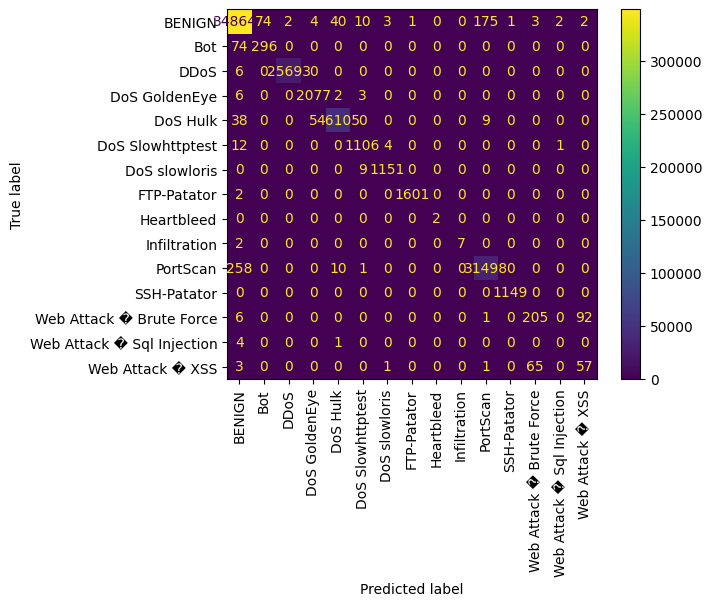

In [ ]:
# train a single model for multi-class classification

# DT model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



X_train = df_train[df_train.columns[:-1]]
y_train = df_train[df_train.columns[-1]]
X_test = df_test[df_test.columns[:-1]]
y_test = df_test[df_test.columns[-1]]
# print the label statistics
print('number of malicious samples in training set: {}'.format(
    sum(y_train !='BENIGN')/len(y_train)))
print('number of malicious samples in testing set: {}'.format(
    sum(y_test !='BENIGN')/len(y_test)))
# train the model
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# prediction
pred = model.predict(X_test)
print('Accuracy of model: {}'.format(accuracy_score(pred,y_test)))
print('Classificatin report of model: {}'.format(classification_report(y_test, pred)))
# plot the confusion matrix
label_encoder = LabelEncoder().fit(y_test)
labels = label_encoder.classes_
cm = confusion_matrix(y_test, pred)
# plot
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
cd.plot()
plt.xticks(rotation=90)
plt.show()


number of malicious samples in training set: 0.2424118706373719
number of malicious samples in testing set: 0.24219114320704638
Accuracy of model: 0.7641849458054225


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classificatin report of model:                             precision    recall  f1-score   support

                    BENIGN       0.76      1.00      0.87    347760
                       Bot       0.00      0.00      0.00       386
                      DDoS       0.00      0.00      0.00     25516
             DoS GoldenEye       0.00      0.00      0.00      2105
                  DoS Hulk       0.97      0.06      0.12     46087
          DoS Slowhttptest       0.00      0.00      0.00      1116
             DoS slowloris       0.00      0.00      0.00      1158
               FTP-Patator       0.00      0.00      0.00      1608
              Infiltration       0.00      0.00      0.00         4
                  PortScan       0.70      0.00      0.01     31503
               SSH-Patator       0.00      0.00      0.00      1211
  Web Attack � Brute Force       0.00      0.00      0.00       299
Web Attack � Sql Injection       0.00      0.00      0.00         4
          Web At

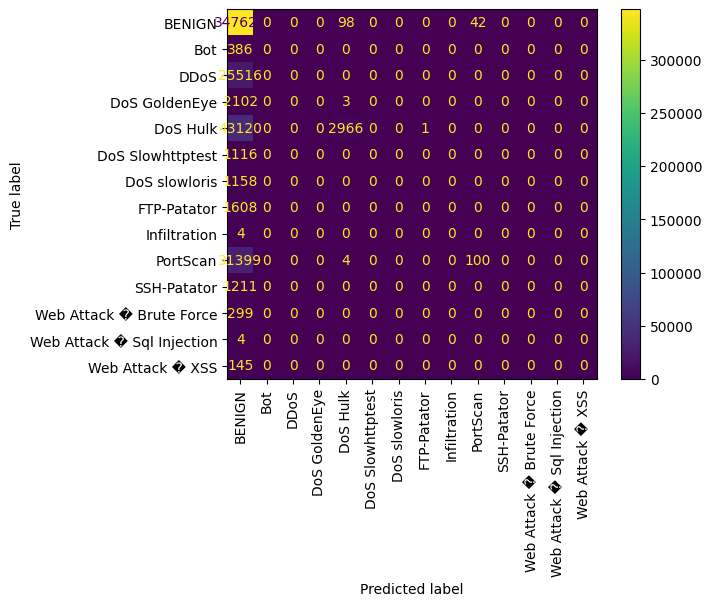

In [ ]:
# NN model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


X_train = df_train[df_train.columns[:-1]]
y_train = df_train[df_train.columns[-1]]
X_test = df_test[df_test.columns[:-1]]
y_test = df_test[df_test.columns[-1]]
# print the label statistics
print('number of malicious samples in training set: {}'.format(
    sum(y_train !='BENIGN')/len(y_train)))
print('number of malicious samples in testing set: {}'.format(
    sum(y_test !='BENIGN')/len(y_test)))
# train the model
model = MLPClassifier(hidden_layer_sizes=(25,), random_state=41, max_iter=200)
model = model.fit(X_train, y_train)

# prediction
pred = model.predict(X_test)
print('Accuracy of model: {}'.format(accuracy_score(pred,y_test)))
print('Classificatin report of model: {}'.format(classification_report(y_test, pred)))
# plot the confusion matrix
label_encoder = LabelEncoder().fit(y_test)
labels = label_encoder.classes_
cm = confusion_matrix(y_test, pred)
# plot
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
cd.plot()
plt.xticks(rotation=90)
plt.show()

# Hierarchical Multi-Class Classification

## 1st layer: Binary classification using df_train

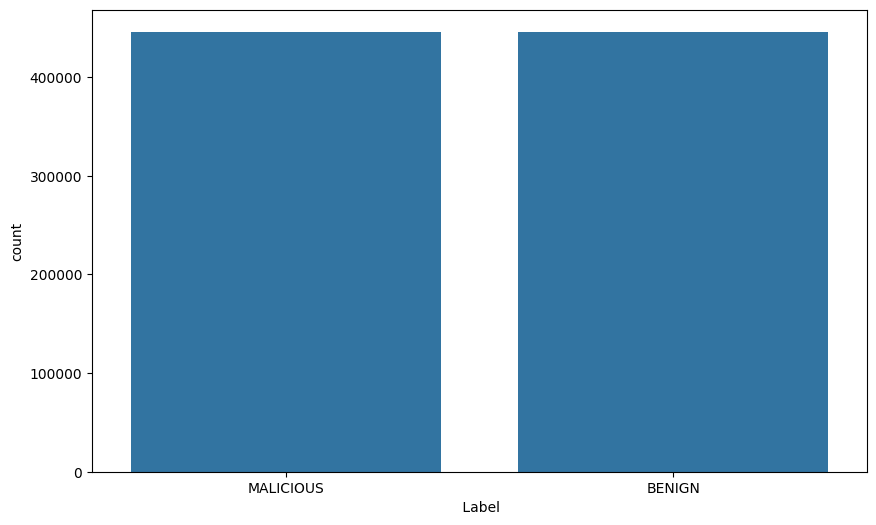

In [ ]:
# 1st layer: Binary classification using df_train
# get the binary training data
df_binary = copy.deepcopy(df_train)
df_binary.loc[df_binary[' Label'] != 'BENIGN', ' Label'] = 'MALICIOUS'
df_binary_benign = df_binary[df_binary[' Label'] == 'BENIGN']
df_binary_malicious = df_binary[df_binary[' Label'] == 'MALICIOUS']
# undersample the benign class
df_benign_undersampled = df_binary_benign.sample(n = len(df_binary_malicious), random_state=42) # cut the length of benign samples
# concat the two dataframes
df_binary_balanced = pandas.concat([df_binary_malicious, df_benign_undersampled])
# shuffle the dataframe
df_binary_balanced = df_binary_balanced.sample(frac=1).reset_index(drop=True)
#
fig = plt.figure(figsize = (10,6))
sns.countplot(x= ' Label', data=df_binary_balanced)
plt.show()

In [ ]:
# get the binary testing data
# get the training data
folder_name = '/content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/'
df_test = pd.read_csv(folder_name + 'test_data.csv')

df_binary_test = copy.deepcopy(df_test)

# merge all the malicious samples
df_binary_test.loc[df_binary_test[' Label'] != 'BENIGN', ' Label'] = 'MALICIOUS'

fig = plt.figure(figsize = (10,6))
sns.countplot(x= ' Label', data=df_binary_test)
plt.show()

NameError: name 'pd' is not defined

number of malicious samples in training set: 0.5
number of malicious samples in testing set: 0.2422774576267505
Accuracy of model for binary classification: 0.9986728153041121
Classificatin report of model for binary classification:               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    348835
   MALICIOUS       1.00      1.00      1.00    111538

    accuracy                           1.00    460373
   macro avg       1.00      1.00      1.00    460373
weighted avg       1.00      1.00      1.00    460373



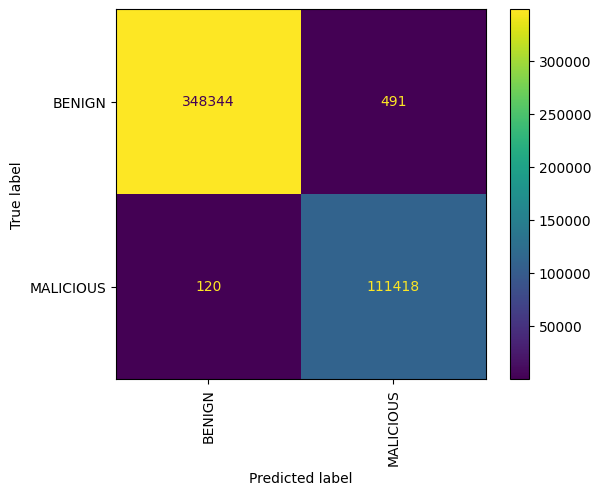

In [ ]:
# DT model for binary classification of BENIGN and MALICIOUS
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# training X and Y
X_train = df_binary_balanced[df_binary_balanced.columns[:-1]]
y_train = df_binary_balanced[df_binary_balanced.columns[-1]]

# testing X and Y
X_test = df_binary_test[df_binary_test.columns[:-1]]
y_test = df_binary_test[df_binary_test.columns[-1]]

# print the label statistics
print('number of malicious samples in training set: {}'.format(
    sum(y_train !='BENIGN')/len(y_train)))
print('number of malicious samples in testing set: {}'.format(
    sum(y_test !='BENIGN')/len(y_test)))
# train the model
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# prediction
pred = model.predict(X_test)
print('Accuracy of model for binary classification: {}'.format(accuracy_score(pred,y_test)))
print('Classificatin report of model for binary classification: {}'.format(classification_report(y_test, pred)))
# plot the confusion matrix
label_encoder = LabelEncoder().fit(y_test)
labels = label_encoder.classes_
cm = confusion_matrix(y_test, pred)
# plot
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
cd.plot()
plt.xticks(rotation=90)
plt.show()

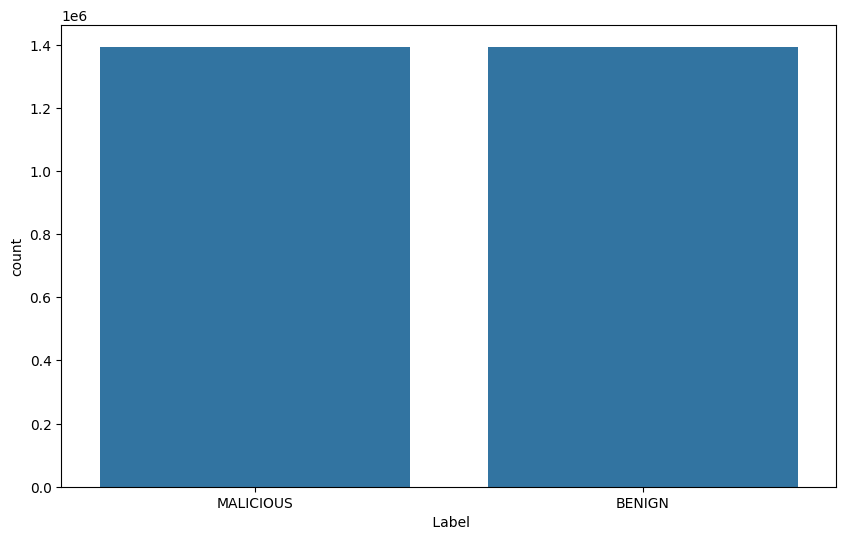

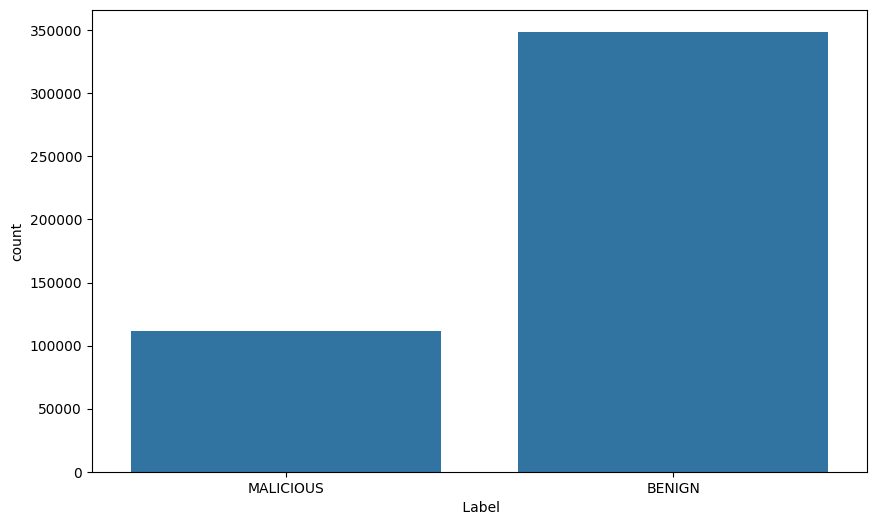

In [ ]:
# upsampling the malicious samples (get more data--> better performance?)
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# up-sampling method
from imblearn.over_sampling import RandomOverSampler

# get the training data
folder_name = '/content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/'
df_train = pd.read_csv(folder_name + 'train_data.csv')

# get the binary training data
df_binary = copy.deepcopy(df_train)
df_binary.loc[df_binary[' Label'] != 'BENIGN', ' Label'] = 'MALICIOUS'
# get the X and y
X = df_binary[df_binary.columns[:-1]]
y = df_binary[df_binary.columns[-1]]

# resampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
df_binary_resampled_up = pd.concat([X_resampled, y_resampled], axis=1)

# plot the data distribution
fig = plt.figure(figsize = (10,6))
sns.countplot(x= ' Label', data=df_binary_resampled_up)
plt.show()


# get the training data
folder_name = '/content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/'
df_test = pd.read_csv(folder_name + 'test_data.csv')

df_binary_test = copy.deepcopy(df_test)

# merge all the malicious samples
df_binary_test.loc[df_binary_test[' Label'] != 'BENIGN', ' Label'] = 'MALICIOUS'

fig = plt.figure(figsize = (10,6))
sns.countplot(x= ' Label', data=df_binary_test)
plt.show()


In [ ]:
# DT model for binary classification of BENIGN and MALICIOUS (test upsampled training data)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# training X and Y
X_train = df_binary_resampled_up[df_binary_resampled_up.columns[:-1]]
y_train = df_binary_resampled_up[df_binary_resampled_up.columns[-1]]

# testing X and Y
X_test = df_binary_test[df_binary_test.columns[:-1]]
y_test = df_binary_test[df_binary_test.columns[-1]]

# print the label statistics
print('number of malicious samples in training set: {}'.format(
    sum(y_train !='BENIGN')/len(y_train)))
print('number of malicious samples in testing set: {}'.format(
    sum(y_test !='BENIGN')/len(y_test)))
# train the model
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# prediction
pred = model.predict(X_test)
print('Accuracy of model for binary classification: {}'.format(accuracy_score(pred,y_test)))
print('Classificatin report of model for binary classification: {}'.format(classification_report(y_test, pred)))
# plot the confusion matrix
label_encoder = LabelEncoder().fit(y_test)
labels = label_encoder.classes_
cm = confusion_matrix(y_test, pred)
# plot
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
cd.plot()
plt.xticks(rotation=90)
plt.show()

number of malicious samples in training set: 0.5
number of malicious samples in testing set: 0.2422774576267505


## 2nd layer multi-class classfication

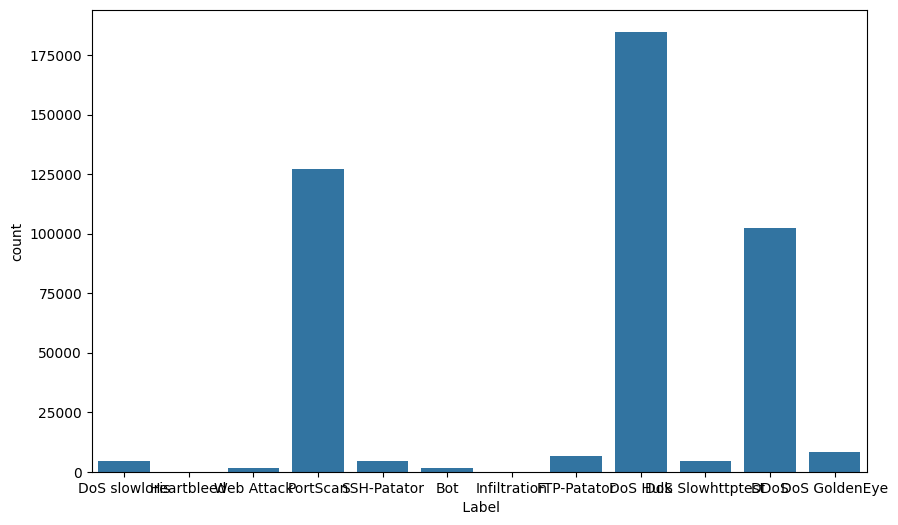

In [ ]:
# 2nd layer: given the df_train,
# --> drop all benign sample, merge all web attacks
# --> multi-class classifier
# --> evaluate the performance on df_test
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# get the training data
folder_name = '/content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/'
df_train = pd.read_csv(folder_name + 'train_data.csv')

# get the malicious samples only from df_train
df_train_malicious = df_train[df_train[' Label'] != 'BENIGN']

# merge all web attacks
web_attack_labels = ['Web Attack � Brute Force', 'Web Attack � Sql Injection','Web Attack � XSS']
df_train_malicious.loc[df_train_malicious[' Label'].isin(web_attack_labels), ' Label'] = 'Web Attack'

# plot the distribution of df_train_malicious
fig = plt.figure(figsize = (10,6))
sns.countplot(x= ' Label', data=df_train_malicious)
plt.show()

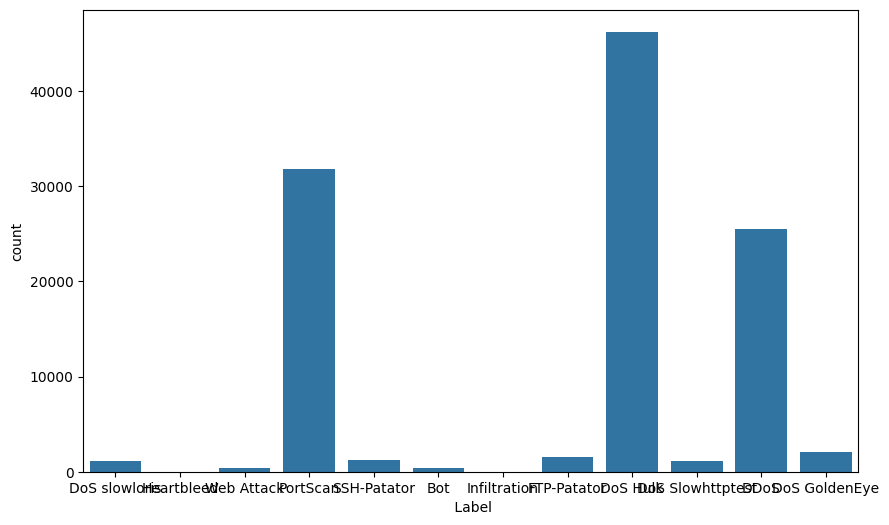

In [ ]:
# get the testing data for 2nd classifier
# get the testing data
folder_name = '/content/drive/MyDrive/CS345/Project_3/NetworkTraffic/MachineLearningCVE/'
df_test = pd.read_csv(folder_name + 'test_data.csv')

# get the malicious samples only from df_train
df_test_malicious = df_test[df_test[' Label'] != 'BENIGN']

# merge all web attacks
web_attack_labels = ['Web Attack � Brute Force', 'Web Attack � Sql Injection','Web Attack � XSS']
df_test_malicious.loc[df_test_malicious[' Label'].isin(web_attack_labels), ' Label'] = 'Web Attack'

# plot the distribution of df_train_malicious
fig = plt.figure(figsize = (10,6))
sns.countplot(x= ' Label', data=df_test_malicious)
plt.show()

Accuracy of model for 2nd multi-class classification: 0.9994799978482669


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classificatin report of model for 2nd multi-class classification:                   precision    recall  f1-score   support

             Bot       1.00      1.00      1.00       414
            DDoS       1.00      1.00      1.00     25534
   DoS GoldenEye       1.00      1.00      1.00      2102
        DoS Hulk       1.00      1.00      1.00     46229
DoS Slowhttptest       0.99      0.99      0.99      1109
   DoS slowloris       0.99      0.99      0.99      1132
     FTP-Patator       1.00      1.00      1.00      1518
      Heartbleed       1.00      0.67      0.80         3
    Infiltration       0.00      0.00      0.00         2
        PortScan       1.00      1.00      1.00     31856
     SSH-Patator       1.00      1.00      1.00      1225
      Web Attack       0.99      0.98      0.99       414

        accuracy                           1.00    111538
       macro avg       0.91      0.89      0.90    111538
    weighted avg       1.00      1.00      1.00    111538



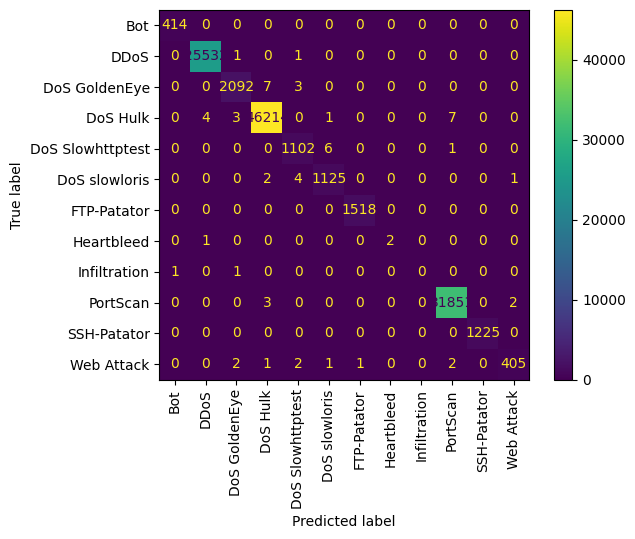

In [ ]:
# train and test a DT model for 2nd classification --> output attack types
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# training X and Y
X_train = df_train_malicious[df_train_malicious.columns[:-1]]
y_train = df_train_malicious[df_train_malicious.columns[-1]]

# testing X and Y
X_test = df_test_malicious[df_test_malicious.columns[:-1]]
y_test = df_test_malicious[df_test_malicious.columns[-1]]

# train the model
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# prediction
pred = model.predict(X_test)
print('Accuracy of model for 2nd multi-class classification: {}'.format(accuracy_score(pred,y_test)))
print('Classificatin report of model for 2nd multi-class classification: {}'.format(classification_report(y_test, pred)))
# plot the confusion matrix
label_encoder = LabelEncoder().fit(y_test)
labels = label_encoder.classes_
cm = confusion_matrix(y_test, pred)
# plot
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
cd.plot()
plt.xticks(rotation=90)
plt.show()

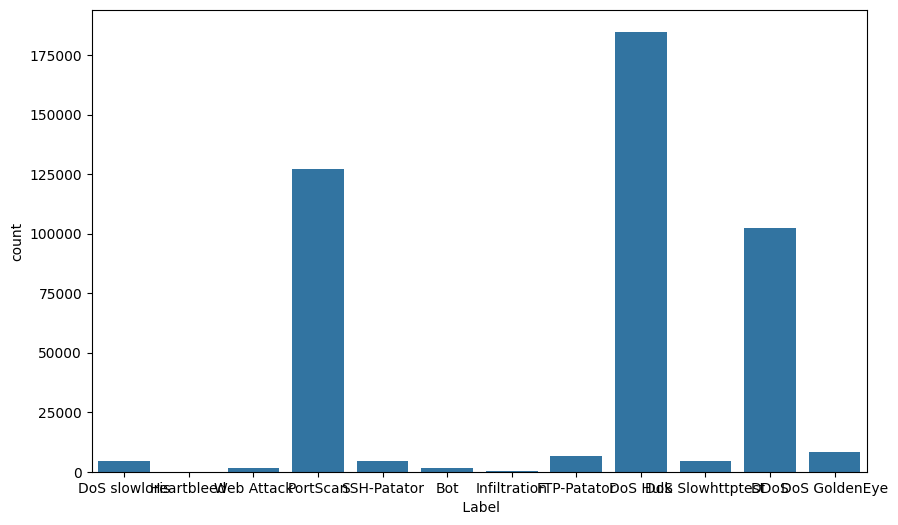

In [ ]:
# goal: further improve the performance of 2nd classifier on Infiltration class only
# problem: we dont have enough data for Infiltration class
# solution: up-sample Infiltration class only?

# upsampling of Infiltration in df_train_malicious
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy={'Infiltration': 200}, random_state=42)

X = df_train_malicious[df_train_malicious.columns[:-1]]
y = df_train_malicious[df_train_malicious.columns[-1]]

X_resampled, y_resampled = ros.fit_resample(X, y)
df_train_malicious_inf_up = pd.concat([X_resampled, y_resampled], axis=1)

# plot

fig = plt.figure(figsize = (10,6))
sns.countplot(x= ' Label', data=df_train_malicious_inf_up)
plt.show()

Accuracy of model for 2nd multi-class classification (Infiltration upsampled): 0.9994889634026072


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classificatin report of model for 2nd multi-class classification (Infiltration upsampled):                   precision    recall  f1-score   support

             Bot       1.00      1.00      1.00       414
            DDoS       1.00      1.00      1.00     25534
   DoS GoldenEye       1.00      0.99      1.00      2102
        DoS Hulk       1.00      1.00      1.00     46229
DoS Slowhttptest       0.99      0.99      0.99      1109
   DoS slowloris       0.99      0.99      0.99      1132
     FTP-Patator       1.00      1.00      1.00      1518
      Heartbleed       1.00      0.67      0.80         3
    Infiltration       0.00      0.00      0.00         2
        PortScan       1.00      1.00      1.00     31856
     SSH-Patator       1.00      1.00      1.00      1225
      Web Attack       0.99      0.98      0.98       414

        accuracy                           1.00    111538
       macro avg       0.91      0.89      0.90    111538
    weighted avg       1.00      1.00

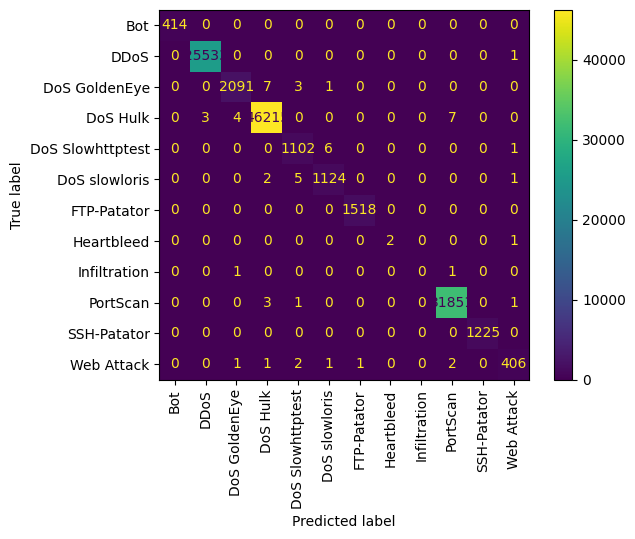

In [ ]:
# train and test a DT model for 2nd classification --> output attack types (Infiltration class upsampled from 36 to 200)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# training X and Y
X_train = df_train_malicious_inf_up[df_train_malicious_inf_up.columns[:-1]]
y_train = df_train_malicious_inf_up[df_train_malicious_inf_up.columns[-1]]

# testing X and Y
X_test = df_test_malicious[df_test_malicious.columns[:-1]]
y_test = df_test_malicious[df_test_malicious.columns[-1]]

# train the model
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# prediction
pred = model.predict(X_test)
print('Accuracy of model for 2nd multi-class classification (Infiltration upsampled): {}'.format(accuracy_score(pred,y_test)))
print('Classificatin report of model for 2nd multi-class classification (Infiltration upsampled): {}'.format(classification_report(y_test, pred)))
# plot the confusion matrix
label_encoder = LabelEncoder().fit(y_test)
labels = label_encoder.classes_
cm = confusion_matrix(y_test, pred)
# plot
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
cd.plot()
plt.xticks(rotation=90)
plt.show()

## 3rd layer multi-class classfication

Accuracy of model on web attack data: 0.6591422121896162
Classificatin report of model on web attack data:                             precision    recall  f1-score   support

  Web Attack � Brute Force       0.75      0.76      0.75       301
Web Attack � Sql Injection       1.00      0.71      0.83         7
          Web Attack � XSS       0.44      0.43      0.44       135

                  accuracy                           0.66       443
                 macro avg       0.73      0.63      0.67       443
              weighted avg       0.66      0.66      0.66       443



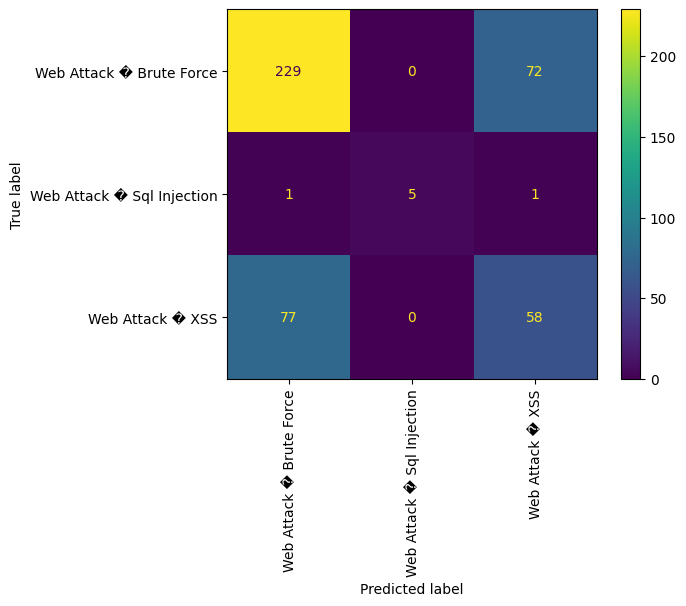

In [ ]:
# DT model on imbalanced malicious data (web attack samples only)
# DT model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# merge all web attacks
web_attack_labels = ['Web Attack � Brute Force', 'Web Attack � Sql Injection','Web Attack � XSS']
# get web attack samples from df_train and df_test
df_train_web_attack = df_train[df_train[' Label'].isin(web_attack_labels)]
df_test_web_attack = df_test[df_test[' Label'].isin(web_attack_labels)]

X_train = df_train_web_attack[df_train_web_attack.columns[:-1]]
y_train = df_train_web_attack[df_train_web_attack.columns[-1]]
X_test = df_test_web_attack[df_test_web_attack.columns[:-1]]
y_test = df_test_web_attack[df_test_web_attack.columns[-1]]

# train the model
model = DecisionTreeClassifier() # KNeighborsClassifier(n_neighbors =3)
model = model.fit(X_train, y_train)

# prediction
pred = model.predict(X_test)
print('Accuracy of model on web attack data: {}'.format(accuracy_score(pred,y_test)))
print('Classificatin report of model on web attack data: {}'.format(classification_report(y_test, pred)))
# plot the confusion matrix
label_encoder = LabelEncoder().fit(y_test)
labels = label_encoder.classes_
cm = confusion_matrix(y_test, pred)
# plot
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
cd.plot()
plt.xticks(rotation=90)
plt.show()

## Finally, using these 3 layers of models to build up a hierarchical multi-class classification system. Report the testing accuracy of df_test